<a href="https://colab.research.google.com/github/PedramDbg/CS-MachineLearning/blob/main/Assignment_4/ML_HW_04_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Problem 2***

In [ ]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV

In [ ]:
# connect to the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# transfer data
path = "/content/drive/My Drive/Machine_Learning/Assignments/assignment_4"

df_train = pd.read_excel(path+"/Asssignment4_Data.xlsx", sheet_name= "Train")
df_test  = pd.read_excel(path+"/Asssignment4_Data.xlsx", sheet_name= "Test" )


In [ ]:
# create training and test sets (features & labels)

x_train = df_train.drop(["House ID", "Construction type"], axis=1).to_numpy()
x_test = df_test.drop(["House ID", "Construction type"], axis=1).to_numpy()

lab_train = df_train.iloc[: , -1].to_numpy()
lab_test = df_test.iloc[: , -1].to_numpy()

lab_sorted, y_train = np.unique(lab_train, return_inverse=True)
y_test = np.zeros_like(lab_test)
for i in range (len(lab_sorted)):
  y_test[lab_test==lab_sorted[i]]= i
y_test = y_test.astype(np.int32)

features = df_train.drop(["House ID", "Construction type"], axis=1).columns.to_numpy()


In [ ]:
# standardize data
mean_x = np.mean(x_train, axis=0) # calculate mean of the training set
std_x = np.std(x_train, axis=0) # calculate standard deviation of the training set

x_train_st = (x_train - mean_x) / std_x # standardize features on the trainig set
x_test_st = (x_test - mean_x) / std_x # standardize features on the test set


In [ ]:
# create the classifier and training

model_classifier = DecisionTreeClassifier() #max_depth =3, random_state = 42
model_classifier.fit(x_train_st, y_train)


DecisionTreeClassifier()

**Part 1: Use the default parameters.**

**a. What is the accuracy on the training set?**

**b. What is the accuracy on the test set?**

The answers exist in the next cell.


In [ ]:
# predict using the built model
pred_dec_tree_train = model_classifier.predict(x_train_st)
pred_dec_tree_test = model_classifier.predict(x_test_st)

# calculate the accuracy of the prediction
acc_train = metrics.accuracy_score(y_train, pred_dec_tree_train)
acc_test = metrics.accuracy_score(y_test, pred_dec_tree_test)

print("The training set accuracy is: ", acc_train)
print("The test set accuracy is: ", acc_test)

The training set accuracy is:  1.0
The test set accuracy is:  0.4


In [ ]:
# train models with different depths

acc_train_lst = []
acc_test_lst = []
models = range(1, 8)

for k in models:

  model_classifier = DecisionTreeClassifier(max_depth=k)
  model_classifier.fit(x_train_st, y_train)

  # prediction
  pred_dec_tree_train = model_classifier.predict(x_train_st)
  pred_dec_tree_test = model_classifier.predict(x_test_st)

  # calculate the accuracy of the prediction
  acc_train_models = metrics.accuracy_score(y_train, pred_dec_tree_train)
  acc_test_models = metrics.accuracy_score(y_test, pred_dec_tree_test)
 
  # build the accuracy vector
  acc_train_lst.append(acc_train_models)
  acc_test_lst.append(acc_test_models)
  

**Part 2: What is the effect of restricting the maximum depth of the tree? Try different depths and find the best value.**

The bias and variance errors alter as the depth is restricted. The ideal depth is 2, which offers comparable accuracy on the training set and more accurate prediction on the test set. The overfitting and variance error will increase as the depth is increased. Low depth also results in severe bias inaccuracy.

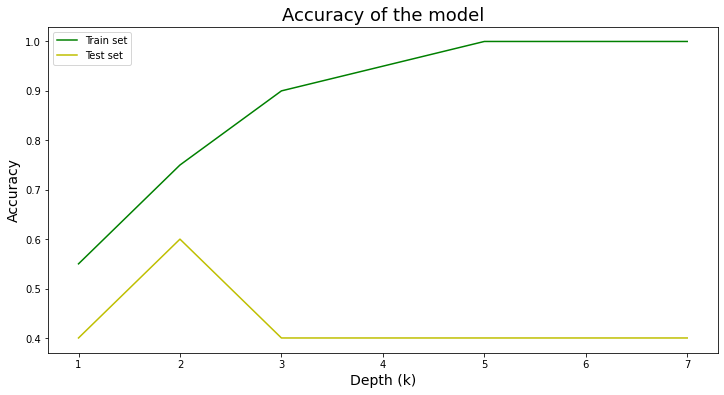

In [ ]:
# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(models, acc_train_lst, color='g', label="Train set")
plt.plot(models, acc_test_lst, color='y', label="Test set")
plt.xlabel('Depth (k)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy of the model', fontsize=18)
plt.legend()
plt.show()

**Part 3: Why does restricting the depth have such a strong effect on the classifier performance?**

An excessive increase in depth results in poor generalization. In other words, increasing depth causes variance to rise while reducing bias. Since the complexity of the models is reduced when the depth is decreased, the bias also increases.

In [ ]:
# Create the 2nd model
# the 2nd model was the best (k=2)
model_classifier_2 = DecisionTreeClassifier(max_depth=2)
model_classifier_2.fit(x_train_st, y_train)

# prediction
pred_dec_tree_test_2 = model_classifier_2.predict(x_test_st)
pred_dec_tree_train_2 = model_classifier_2.predict(x_train_st)

# calculate the accuracy of the prediction
acc_test_2 = metrics.accuracy_score(y_test, pred_dec_tree_test_2)
acc_train_2 = metrics.accuracy_score(y_train, pred_dec_tree_train_2)

print("The training set accuracy for the best model is: ", acc_train_2)
print("The test set accuracy for the best model is: ", acc_test_2)

The training set accuracy for the best model is:  0.75
The test set accuracy for the best model is:  0.8


**Part 4: Visualize the resulting tree. Perform the inference on this tree manually (i.e. show/trace the path taken towards classification) and provide a classification for the following example:**

The "age of the home" is the first feature. It is $-1.11667942$, less than $0.11$. 
The "local price" is the second characteristic. The "local pricing" is $0.70805978$ which is greater than $0.51$. 
Therefore, apartment is the predicted outcome (class:0).


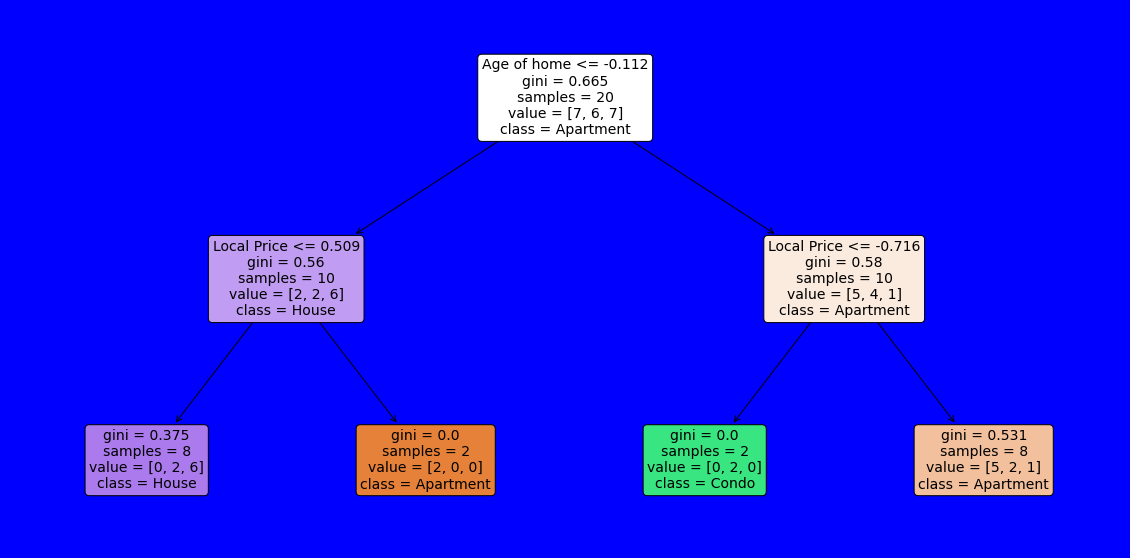

In [ ]:
# plot
plt.figure(figsize=(20,10), facecolor ='b')
# plot the tree
a = tree.plot_tree(model_classifier_2, feature_names = features, class_names = lab_sorted, rounded = True, filled = True, fontsize=14)
plt.show()

In [ ]:
#export the decision rules
tree_chart = export_text(model_classifier_2, feature_names = list(features))
print(tree_chart)

|--- Age of home <= -0.11
|   |--- Local Price <= 0.51
|   |   |--- class: 2
|   |--- Local Price >  0.51
|   |   |--- class: 0
|--- Age of home >  -0.11
|   |--- Local Price <= -0.72
|   |   |--- class: 1
|   |--- Local Price >  -0.72
|   |   |--- class: 0



In [ ]:
# define the new test set
x_test_new = np.array([[9.0384, 1, 7.8, 1.5, 1.5, 7, 3, 23]])
# standardize features existing in the new test set
x_test_new_st = (x_test_new - mean_x) / std_x
print("The new test set standardized form is: ",x_test_new_st)

The new test set standardized form is:  [[ 0.70805978 -0.4888129   0.60717226  0.03268433  0.45485883  0.33333333
  -0.32616404 -1.11667942]]
